## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from statsmodels.formula.api import ols
import seaborn as sns

%matplotlib inline

In [2]:
df_original = pd.read_csv('data/kc_house_data_reload.csv')

In [3]:
df = df_original.copy()

In [4]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'].isna().sum()

454

In [5]:
df.dropna(subset=['sqft_basement'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long       

In [7]:
df_house = df.drop(['date','id','view','waterfront','lat','long','view','yr_renovated'], axis=1)

In [8]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   condition      21143 non-null  int64  
 7   grade          21143 non-null  int64  
 8   sqft_above     21143 non-null  int64  
 9   sqft_basement  21143 non-null  float64
 10  yr_built       21143 non-null  int64  
 11  zipcode        21143 non-null  int64  
 12  sqft_living15  21143 non-null  int64  
 13  sqft_lot15     21143 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.4 MB


In [9]:
numerical_cols = df_house[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']]

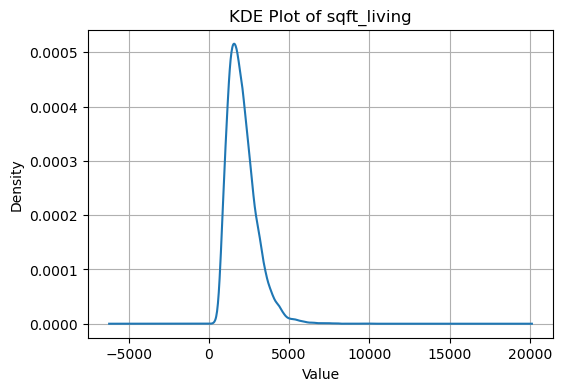

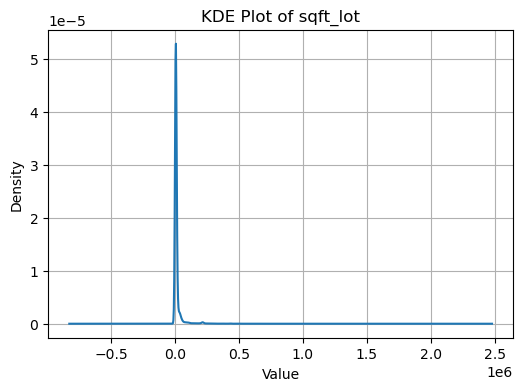

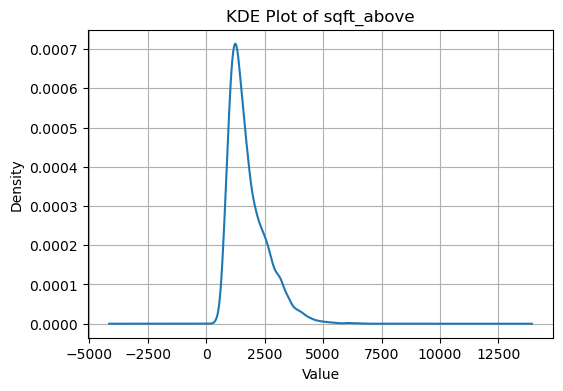

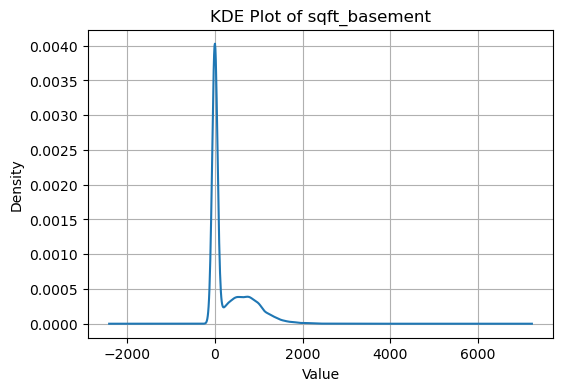

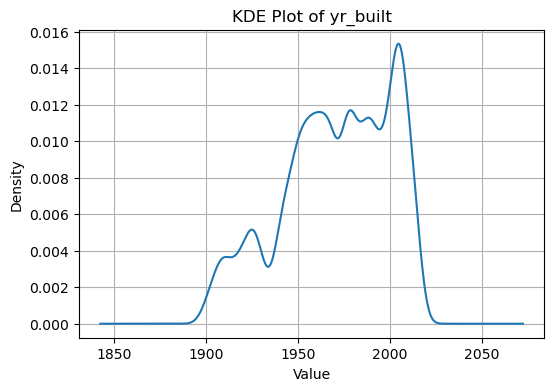

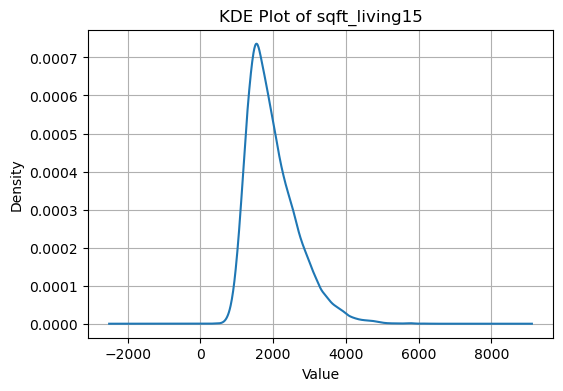

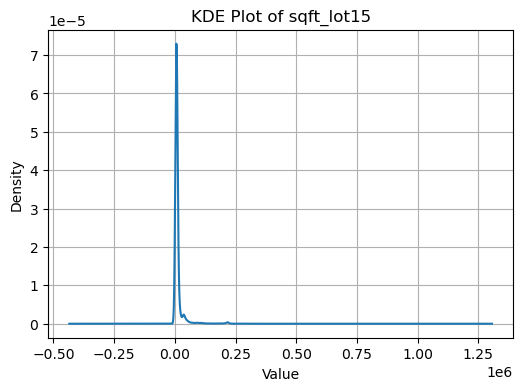

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].plot(kind='kde')
    plt.title(f'KDE Plot of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

In [11]:
categorical_columns = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode']
continuous_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15','sqft_lot15']

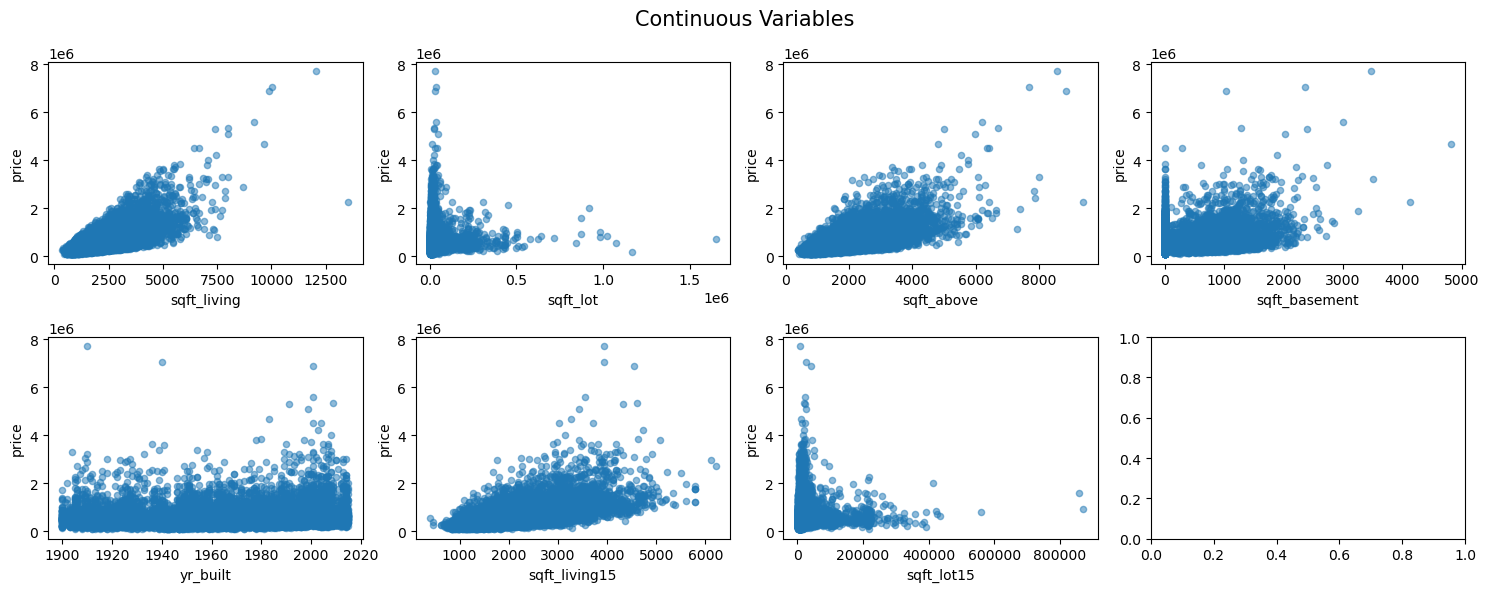

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for xcol, ax in zip(continuous_columns, axes.flatten()):
    if not continuous_columns:
        break
    df_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

fig.suptitle("Continuous Variables", fontsize=15)

plt.tight_layout()
plt.show()

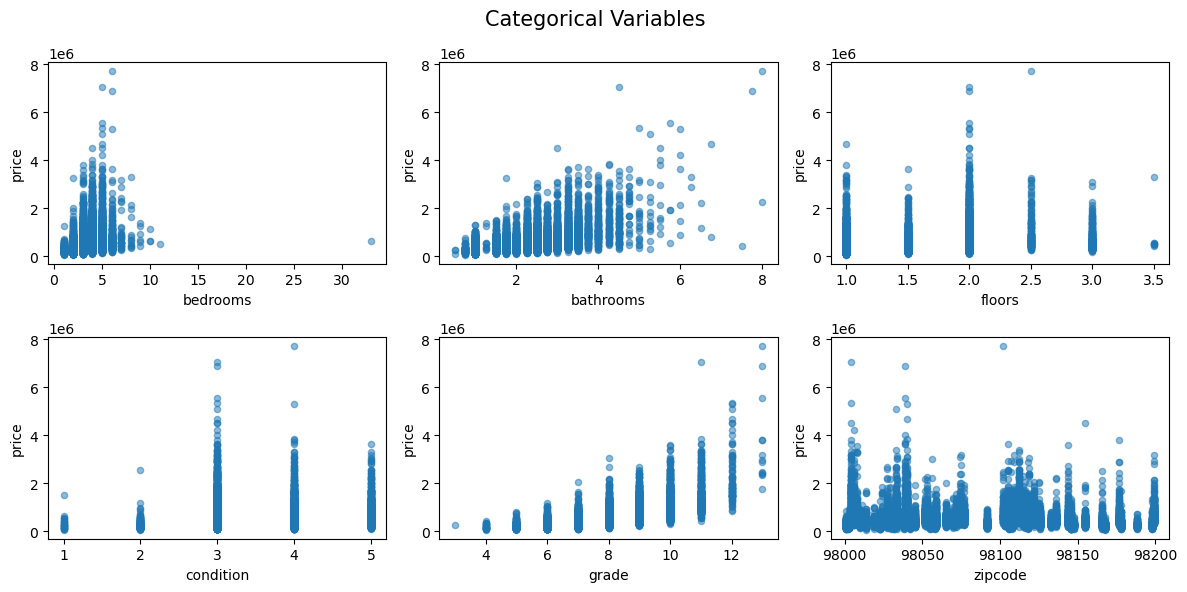

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

for xcol, ax in zip(categorical_columns, axes.flatten()):
    if not categorical_columns:
        break
    df_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

fig.suptitle("Categorical Variables", fontsize=15)

plt.tight_layout()
plt.show()

### Removing Outliers

In [14]:
z_scores = df_house.apply(lambda x: (x - x.mean()) / x.std())
threshold = 4
df_clean = df_house[(z_scores.abs() < threshold).all(axis=1)]

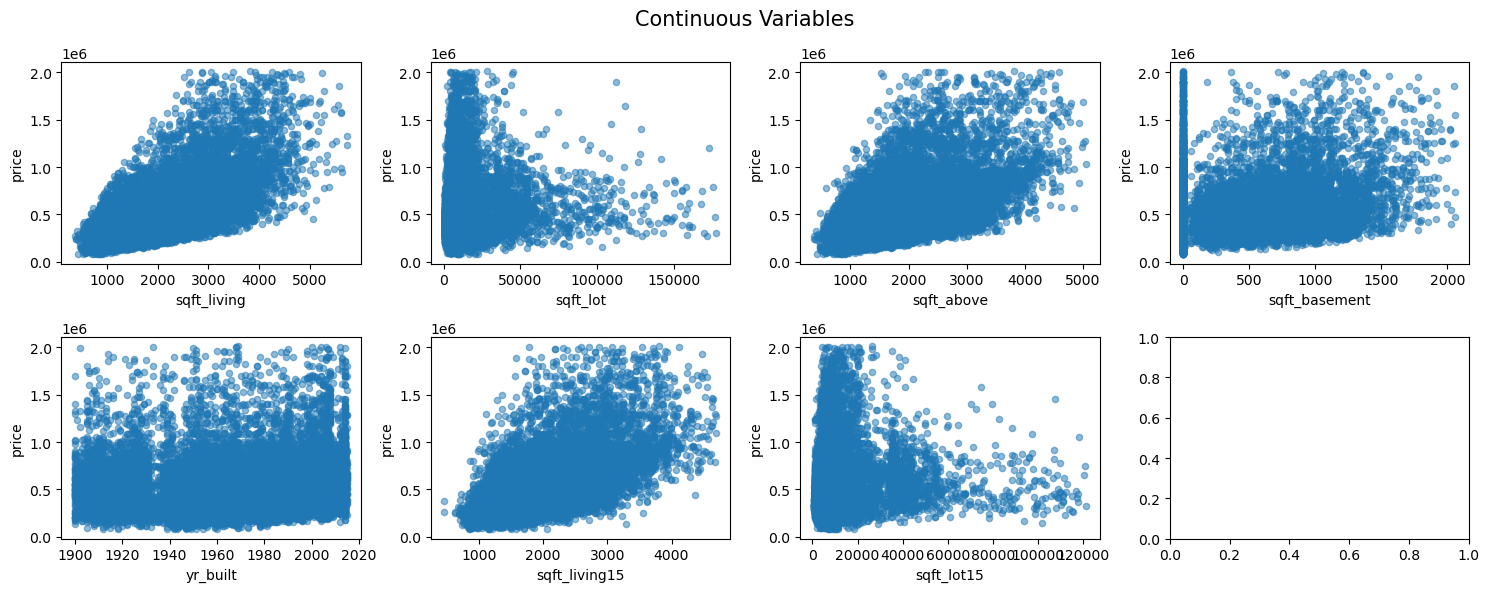

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for xcol, ax in zip(continuous_columns, axes.flatten()):
    if not continuous_columns:
        break
    df_clean.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

fig.suptitle("Continuous Variables", fontsize=15)

plt.tight_layout()
plt.show()

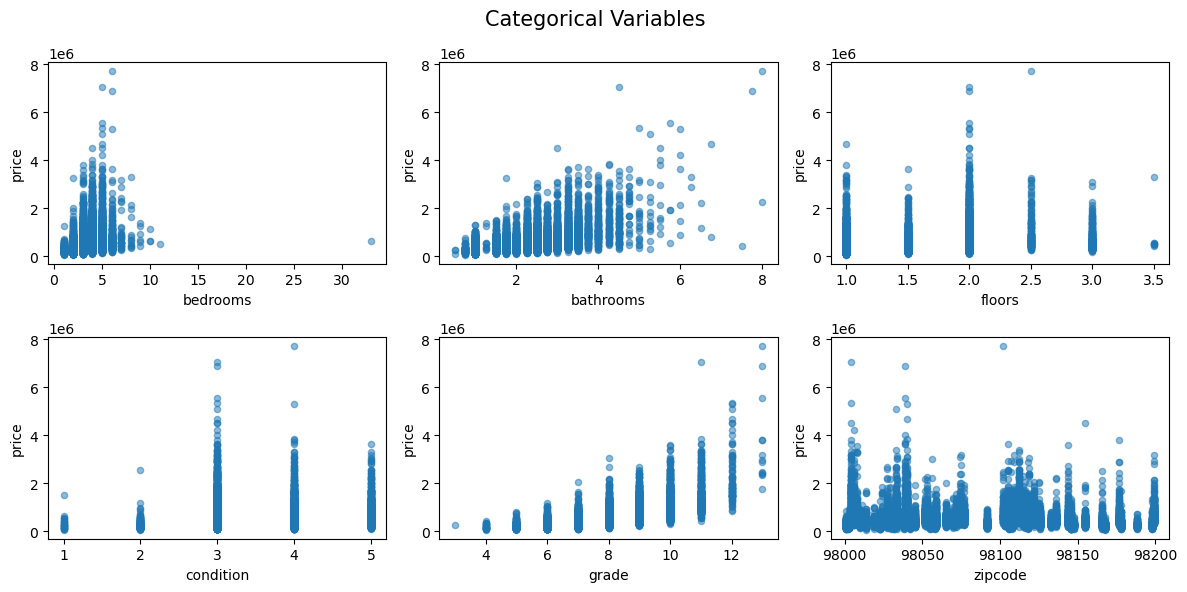

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

for xcol, ax in zip(categorical_columns, axes.flatten()):
    if not categorical_columns:
        break
    df_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

fig.suptitle("Categorical Variables", fontsize=15)

plt.tight_layout()
plt.show()

### Checking for High Multicolinearity

In [17]:
numerical_variables = df_clean[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                                'yr_built', 'sqft_living15','sqft_lot15']]

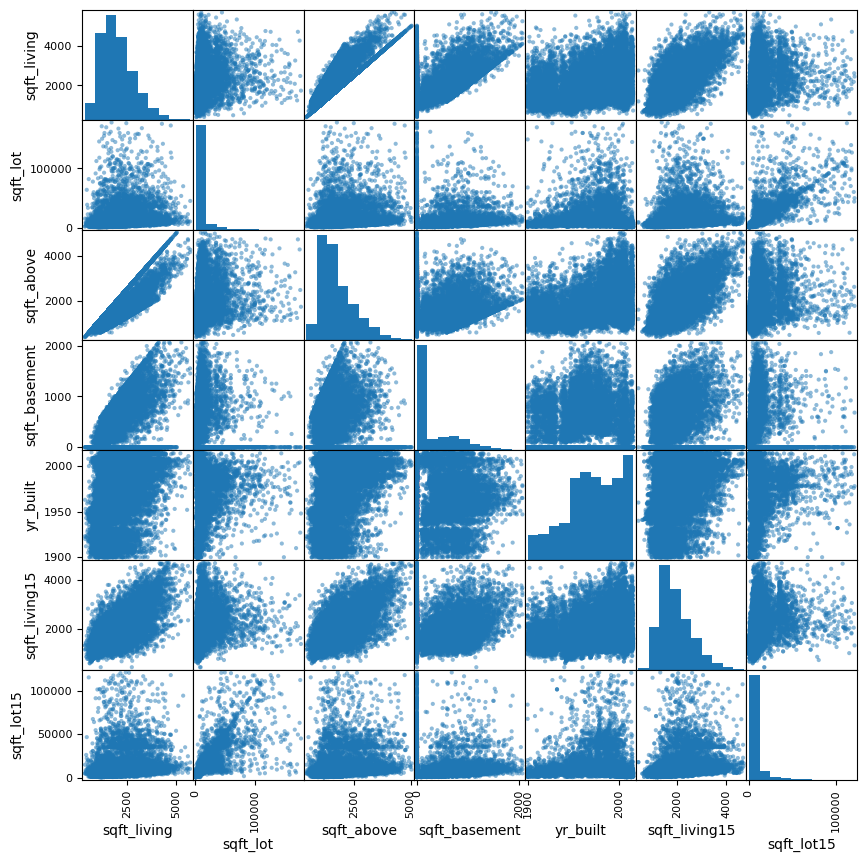

In [18]:
pd.plotting.scatter_matrix(numerical_variables,figsize  = [10, 10]);
plt.show()

In [19]:
numerical_variables.corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
sqft_living,1.000000,0.220387,0.859728,0.393825,0.337730,0.753949,0.221729
sqft_lot,0.220387,1.000000,0.218829,0.033963,0.036126,0.248597,0.787175
sqft_above,0.859728,0.218829,1.000000,-0.130894,0.446478,0.724414,0.222527
sqft_basement,0.393825,0.033963,-0.130894,1.000000,-0.147961,0.159747,0.029912
yr_built,0.337730,0.036126,0.446478,-0.147961,1.000000,0.333589,0.058562
sqft_living15,0.753949,0.248597,0.724414,0.159747,0.333589,1.000000,0.277614
sqft_lot15,0.221729,0.787175,0.222527,0.029912,0.058562,0.277614,1.000000


In [20]:
abs(numerical_variables.corr()) > 0.75

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
sqft_living,True,False,True,False,False,True,False
sqft_lot,False,True,False,False,False,False,True
sqft_above,True,False,True,False,False,False,False
sqft_basement,False,False,False,True,False,False,False
yr_built,False,False,False,False,True,False,False
sqft_living15,True,False,False,False,False,True,False
sqft_lot15,False,True,False,False,False,False,True


In [21]:
numeric_pairs = numerical_variables.corr().abs().stack().reset_index().sort_values(0, ascending=False)
numeric_pairs['pairs'] = list(zip(numeric_pairs.level_0, numeric_pairs.level_1))
numeric_pairs.set_index(['pairs'], inplace=True)
numeric_pairs.drop(columns=['level_1', 'level_0'], inplace=True)
numeric_pairs.columns = ['cc']
numeric_pairs.drop_duplicates(inplace=True)

In [22]:
numeric_pairs[(numeric_pairs.cc > 0.75) & (numeric_pairs.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.859728
"(sqft_lot15, sqft_lot)",0.787175
"(sqft_living, sqft_living15)",0.753949


The description for each column with high multicolinearity can be seen below:
* __sqft_living:__ footage of the home
* __sqft_above:__ square footage of house apart from basement
* __sqft_living15:__ The square footage of interior housing living space for the nearest 15 neighbors
* __sqft_lot15:__ The square footage of the land lots of the nearest 15 neighbors
* __sqft_lot:__ footage of the lot

I think that removing the following columns would make the most sense based on their descriptions and impact on the data:
* __sqft_above__
* __sqft_lot15__
* __sqft_living15__

In [23]:
df_cleaned = df_clean.drop(['sqft_above', 'sqft_lot15', 'sqft_living15'], axis=1)

In [24]:
#Checking the high multicolinearity was fixed
cleaned_num_variables = df_cleaned[['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']]

numeric_pairs = cleaned_num_variables.corr().abs().stack().reset_index().sort_values(0, ascending=False)
numeric_pairs['pairs'] = list(zip(numeric_pairs.level_0, numeric_pairs.level_1))
numeric_pairs.set_index(['pairs'], inplace=True)
numeric_pairs.drop(columns=['level_1', 'level_0'], inplace=True)
numeric_pairs.columns = ['cc']
numeric_pairs.drop_duplicates(inplace=True)

numeric_pairs[(numeric_pairs.cc > 0.75) & (numeric_pairs.cc < 1)]

,cc
pairs,


In [25]:
predictor_cols = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode','sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

In [26]:
outcome = 'price'
x_cols = predictor_cols
predictors = '+'.join(x_cols)
formula = f"{outcome} ~ {predictors}"
model = ols(formula=formula, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3158.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:12:01   Log-Likelihood:            -2.7588e+05
No. Observations:               20444   AIC:                         5.518e+05
Df Residuals:                   20433   BIC:                         5.519e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.365e+06   2.56e+06      0.533      0.594   -3.66e+06    6.39e+06
bedrooms      -3.045e+04   1833.435    -16.609      0.000    -3.4e+04   -2.69e+04
bathrooms      3.882e+04   2979.194     13.029      0.000     3.3e+04    4.47e+04
floors         3.791e+04   3255.441     11.646      0.000    3.15e+04    4.43e+04
condition      2.018e+04   2077.875      9.711      0.000    1.61e+04    2.43e+04
grade           1.28e+05   1834.818     69.738      0.000    1.24e+05    1.32e+05
zipcode          45.9326     25.726      1.785      0.074      -4.493      96.358
sqft_living     125.0861      3.232     38.700      0.000     118.751     131.421
sqft_lot         -0.5934      0.093     -6.371      0.000      -0.776      -0.411
sqft_basement    25.0601      3.919      6.395      0.000      17.379      32.741
yr_built      -3393.4925     59.364    -57.164      0.000   -3509.852   -3277.133
==============================================================================
Omnibus:                     5708.360   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27209.139
Skew:                           1.280   Prob(JB):                         0.00
Kurtosis:                       8.039   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Creating Dummy Variables

In [27]:
bedroom_dummies = pd.get_dummies(df_cleaned['bedrooms'], prefix='beds', drop_first=True).astype(int)
bathrooms_dummies = pd.get_dummies(df_cleaned['bathrooms'], prefix='bath', drop_first=True).astype(int)
floors_dummies = pd.get_dummies(df_cleaned['floors'], prefix='floors', drop_first=True).astype(int)
condition_dummies = pd.get_dummies(df_cleaned['condition'], prefix='cond', drop_first=True).astype(int)
grade_dummies = pd.get_dummies(df_cleaned['grade'], prefix='grade', drop_first=True).astype(int)
zipcode_dummies = pd.get_dummies(df_cleaned['zipcode'], prefix='zip', drop_first=True).astype(int)

In [28]:
dummy_columns = pd.concat(
    [bedroom_dummies, bathrooms_dummies, floors_dummies, condition_dummies, grade_dummies, zipcode_dummies], axis=1)

In [29]:
df_dummy = df_cleaned.drop(['bedrooms','bathrooms','floors','condition','grade','zipcode'], axis=1)

In [30]:
df_new = pd.concat([df_dummy, dummy_columns], axis=1)

In [31]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built'] + list(dummy_columns.columns)
predictors = '+'.join(x_cols)
formula = f"{outcome} ~ {predictors}"
model = ols(formula=formula, data=df_new).fit()

SyntaxError: invalid syntax (<unknown>, line 1)